In [23]:
import pandas as pd
import matplotlib as plt

In [2]:
df=pd.read_pickle('data/soccerDBNew2_n.pkl')

In [7]:
eda=df[['home_team', 'away_team', 'home_team_score', 'away_team_score','city','datetime','game']]

In [19]:
eda['winner']=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
contador=0
for n in range (3419):
    if eda['home_team_score'][contador] > eda['away_team_score'][contador]:
        eda['winner'][contador]='HW'
    elif eda['home_team_score'][contador] < eda['away_team_score'][contador]:
        eda['winner'][contador]='AW'
    else:
        eda['winner'][contador]='D'
    contador+=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
eda.hea

,home_team,away_team,home_team_score,away_team_score,city,datetime,game,winner
0,Palmeiras,Vitória,1,0,"São Paulo, São Paulo",2010-08-05,1,HW
1,Internacional,Cruzeiro,1,2,"Porto Alegre, Rio Grande do Sul",2010-09-05,1,AW
2,Flamengo,São Paulo,1,1,"Rio de Janeiro, Rio de Janeiro",2010-09-05,1,D
3,Atlético GO,Grêmio,0,0,"Goiânia, Goiás",2010-08-05,1,D
4,Atlético MG,Vasco,2,1,"Belo Horizonte, Minas Gerais",2010-09-05,1,HW


# Proporção de vitórias por mando

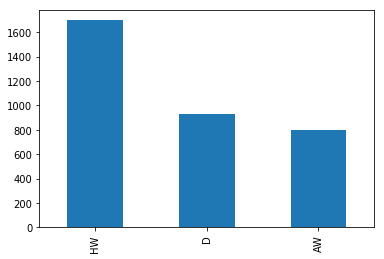

In [45]:
eda['winner'].value_counts().plot.bar()

In [50]:
times=eda[['home_team','winner','datetime']]

In [71]:
times['score_home']=0
times['score_away']=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
times.head()

,home_team,winner,datetime
0,Palmeiras,HW,2010-08-05
1,Internacional,AW,2010-09-05
2,Flamengo,D,2010-09-05
3,Atlético GO,D,2010-08-05
4,Atlético MG,HW,2010-09-05


In [200]:
temp=times.groupby(['home_team'])['winner'].value_counts()

In [204]:
temp

home_team    winner
América MG   HW         22
             AW         18
             D          17
Atlético GO  AW         34
             HW         25
             D          17
Atlético MG  HW        103
             AW         36
             D          32
Atlético PR  HW         89
             D          40
             AW         23
Avaí         D          26
             HW         26
             AW         24
Bahia        HW         45
             D          38
             AW         31
Botafogo     HW         76
             D          44
             AW         32
Ceará        HW         23
             D          22
             AW         12
Chapecoense  HW         44
             D          26
             AW         24
Corinthians  HW        105
             D          47
             AW         19
                      ... 
Palmeiras    HW         81
             AW         38
             D          33
Paraná       D          10
             AW          6
        